# test

In [27]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import skewtest
import math

In [79]:
mu, sigma = 3, 2 # mean and standard deviation
x = np.random.normal(mu, sigma, 20000)
# x = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )
# x = np.random.rand(200000) #uniform

In [80]:
df = pd.DataFrame(x, columns = ['val'])

array([[<AxesSubplot:title={'center':'val'}>]], dtype=object)

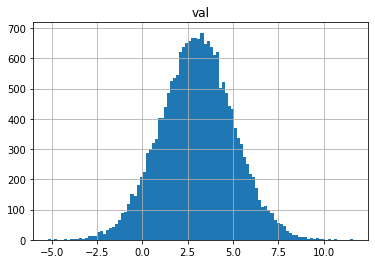

In [81]:
df.hist(bins = 100)

In [75]:
df

,val
0,2.351967
1,3.928597
2,5.333888
3,6.492307
4,5.049706
...,...
19995,-0.609536
19996,1.927845
19997,2.422953
19998,1.624407


<AxesSubplot:>

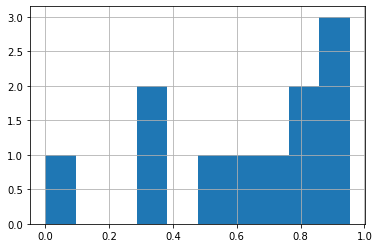

In [76]:
x = [1,2,2,3,4,5,6,7,8,9,9]
df = pd.DataFrame(x, columns=['val'])
np.log10(df['val']).hist()
# df

In [77]:
skewtest(x) # --> statistic < 1

SkewtestResult(statistic=0.10793170906705281, pvalue=0.914049863840515)

array([[<AxesSubplot:title={'center':'val'}>]], dtype=object)

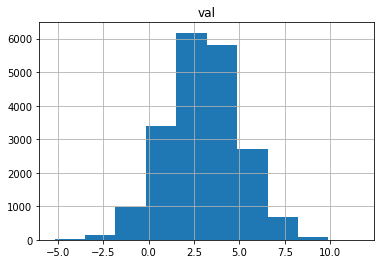

In [82]:
df.hist()

In [83]:
from scipy.stats import normaltest

stat, p = normaltest(df)
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')


stat = [1.67693569], p = [0.43237248]
norm


In [84]:
from scipy.stats import kstest
stat, p = kstest(df, 'norm')
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')

stat = 1.0, p = 0.0
not norm


In [85]:
from scipy.stats import shapiro
stat, p = shapiro(df)
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')


stat = 0.9999265074729919, p = 0.8732671141624451
norm


D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [86]:
from scipy.stats import skewtest

stat, p = skewtest(x)
print('stat = {0}, p = {1}'.format(stat, p))
if stat < 1:
    print('balance')
else:
    print('not balance')

stat = -0.16794648722133607, p = 0.8666253779792008
balance


D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


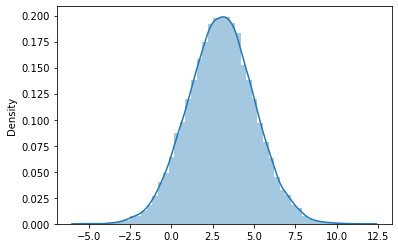

In [87]:
import seaborn as sns
ax = sns.distplot(df)

# real data

In [88]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import skewtest
# import math

In [151]:
df = pd.read_csv('data/20-10-21/R1L1-J3-data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]
df

,Unnamed: 0,date,time,temperature,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,voltage_6,...,pf_4,pf_5,pf_6,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_6,status
0,0,20/08/2021,07:00:00,28,227,227,227,227,227,227,...,0,0,0,50,50,50,50,50,50,normal
1,1,20/08/2021,07:00:00,28,227,226,227,228,228,228,...,0,0,0,49,50,50,49,49,49,normal
2,2,20/08/2021,07:00:00,28,227,227,227,227,227,227,...,0,0,0,49,49,50,49,49,49,normal
3,3,20/08/2021,07:00:00,28,227,227,228,227,227,227,...,0,0,0,49,49,49,50,49,50,normal
4,4,20/08/2021,07:00:00,28,228,227,228,227,227,228,...,0,0,0,50,49,49,50,50,50,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50616,50616,14/10/2021,15:47:25,35,238,238,240,237,238,240,...,0,0,0,50,49,50,50,50,50,normal
50617,50617,14/10/2021,15:47:37,35,238,238,240,237,238,240,...,0,0,0,50,49,49,50,50,49,normal
50618,50618,14/10/2021,15:47:49,35,238,238,240,237,238,241,...,0,0,0,50,49,50,49,49,49,normal
50817,50817,14/10/2021,17:21:26,45,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal


In [286]:
# def clean(df):
focus = 'current_3'
df_focus =  df[['date','time', focus]]	

df_focus = df_focus[df_focus[focus] > 1]
df_focus = df_focus[df_focus[focus] < 100]

df_focus[focus].value_counts()

16    1646
17    1400
18     607
19     386
20     317
      ... 
94       1
80       1
97       1
83       1
82       1
Name: current_3, Length: 73, dtype: int64

array([<AxesSubplot:title={'center':'current_3'}>], dtype=object)

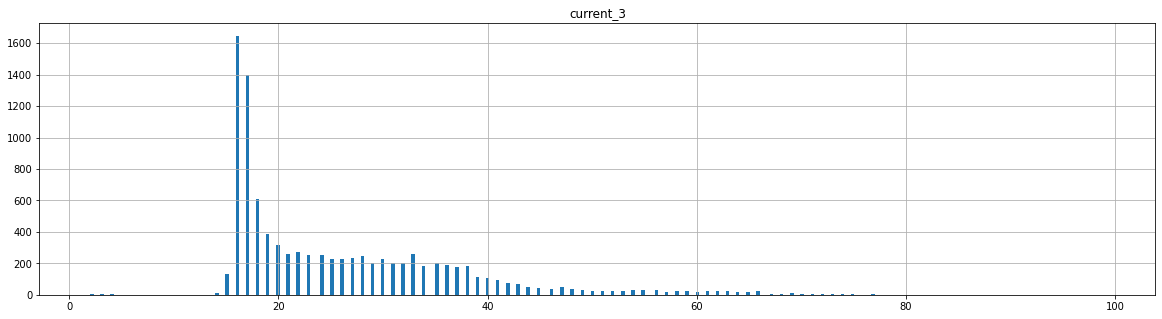

In [312]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(20,5))
df_focus[[focus]].hist(bins = 300,ax=axes)

In [258]:
from scipy.stats import normaltest
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import skewtest
from scipy.stats import skew
import seaborn as sns

def stat_check(df_focus):
    print('===================normaltest=========================')
    stat, p = normaltest(df_focus['tranform'])
    print('stat = {0}, p = {1}'.format(stat, p))
    if p > 0.05:
        print('norm')
    else:
        print('not norm')
    print('\n')

    print('===================kstest=========================')
    stat, p = kstest(df_focus['tranform'], 'norm')
    print('stat = {0}, p = {1}'.format(stat, p))
    if p > 0.05:
        print('norm')
    else:
        print('not norm')
    print('\n')



    print('===================shapiro=========================')
    stat, p = shapiro(df_focus['tranform'])
    print('stat = {0}, p = {1}'.format(stat, p))
    if p > 0.05:
        print('norm')
    else:
        print('not norm')
    print('\n')



    print('===================skwness=========================')
    stat, p = skewtest(df_focus['tranform'])
    print('stat = {0}, p = {1}'.format(stat, p))
    if stat < 1:
        print('balance')
    else:
        print('not balance')
    print('\n')
    
    print('===================skew=========================')
    stat= skew(df_focus['tranform'])
    print('stat = {0}'.format(stat))
    if stat < 1:
        print('balance')
    else:
        print('not balance')
    print('\n')

    ax = sns.distplot(df_focus['tranform'])

===================normaltest=========================
stat = 459.4136704649744, p = 1.7361570294806788e-100
not norm


===================kstest=========================
stat = 0.8780513732809805, p = 0.0
not norm


===================shapiro=========================
stat = 0.9015942811965942, p = 0.0
not norm


===================skwness=========================
stat = 20.55624694248456, p = 6.766917292466562e-94
not balance


===================skew=========================
stat = 0.5453971831516367
balance




D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


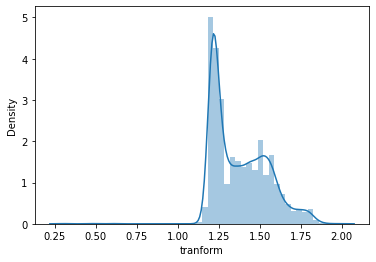

In [259]:
df_focus['tranform'] = np.log10((df_focus[focus]))
# df_focus['tranform'].hist(bins = 100)
stat_check(df_focus)

===================normaltest=========================
stat = 2246.8703947491585, p = 0.0
not norm


===================kstest=========================
stat = 0.545375328153459, p = 0.0
not norm


===================shapiro=========================
stat = 0.8782811164855957, p = 0.0
not norm


===================skwness=========================
stat = -22.97160884298613, p = 8.963071011843626e-117
balance


===================skew=========================
stat = -0.6191702832507686
balance




D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


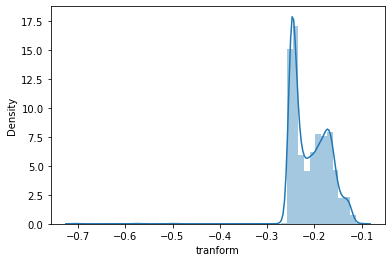

In [260]:
df_focus['tranform'] = -1/np.sqrt(df_focus[focus])
# df_focus['tranform'].hist(bins = 100)
stat_check(df_focus)

===================normaltest=========================
stat = 1300.8724471631695, p = 3.304739782564398e-283
not norm


===================kstest=========================
stat = 0.9989788426173934, p = 0.0
not norm


===================shapiro=========================
stat = 0.8774201273918152, p = 0.0
not norm


===================skwness=========================
stat = 34.59997004052897, p = 2.5290739761300047e-262
not balance


===================skew=========================
stat = 1.028867823671843
not balance




D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


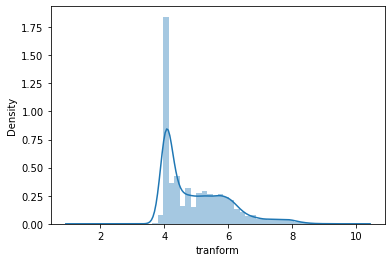

In [261]:
df_focus['tranform'] = np.sqrt(df_focus[focus])
# df_focus['tranform'].hist(bins = 100)
stat_check(df_focus)

===================normaltest=========================
stat = 990.5678179665041, p = 7.960335151755336e-216
not norm


===================kstest=========================
stat = 0.9559457687456445, p = 0.0
not norm


===================shapiro=========================
stat = 0.8931649923324585, p = 0.0
not norm


===================skwness=========================
stat = -4.483206208850312, p = 7.352981199672045e-06
balance


===================skew=========================
stat = -0.11187614589252928
balance


-0.36035272205469565


D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


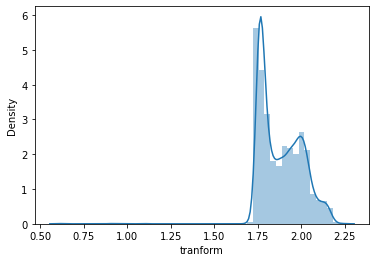

In [305]:
from scipy import stats
df_focus['tranform'], lamda = stats.boxcox(df_focus[focus])
# df_focus['tranform'].hist(bins = 50)
stat_check(df_focus)
print(lamda)

===================normaltest=========================
stat = 888.5570621733349, p = 1.1279387604076788e-193
not norm


===================kstest=========================
stat = 0.9346622735285582, p = 0.0
not norm


===================shapiro=========================
stat = 0.8952360153198242, p = 0.0
not norm


===================skwness=========================
stat = -4.306211366160761, p = 1.6607437922225777e-05
balance


===================skew=========================
stat = -0.10743355802991403
balance


-0.48246099632630257


D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


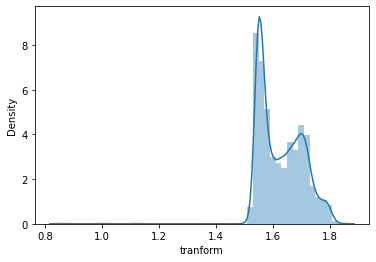

In [327]:
from scipy import stats
df_focus['tranform'], lamda = stats.yeojohnson(df_focus[focus])
# df_focus['tranform'].hist(bins = 50)
stat_check(df_focus)
print(lamda)

In [333]:
q25,q75 = df_focus[focus].quantile([0.25,0.75])
q2,q98 = df_focus[focus].quantile([0.02,0.98])

iqr = q75 - q25
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print('critical: {0},{1}'.format(lower_temp, upper_temp))
print('alert: {0},{1}'.format(q2,q98))

print('\n tranform')
q25,q75 = df_focus['tranform'].quantile([0.25,0.75])
q2,q98 = df_focus['tranform'].quantile([0.02,0.98])

iqr = q75 - q25
lower_temp = q25 - (iqr)
upper_temp = q75 + (iqr)
print('critical: {0},{1}'.format(lower_temp, upper_temp))
print('alert: {0},{1}'.format(q2,q98))

critical: -5.5,54.5
alert: 16.0,60.0

 tranform
critical: 1.4284450632379615,1.8193901227997562
alert: 1.5443899062833246,1.7874825988575813


In [334]:
# df_focus.median()
# stats.boxcox([1, 60],-0.36035272205469565)
stats.yeojohnson([1, 60],-0.48246099632630257)

array([0.58915514, 1.7874826 ])

In [188]:
# check normality

===================normaltest=========================
stat = 2471.9009380274015, p = 0.0
not norm


===================kstest=========================
stat = 0.9997607306680694, p = 0.0
not norm


===================shapiro=========================
stat = 0.8376098871231079, p = 0.0
not norm


===================skwness=========================
stat = 43.94566830356793, p = 0.0
not balance




D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


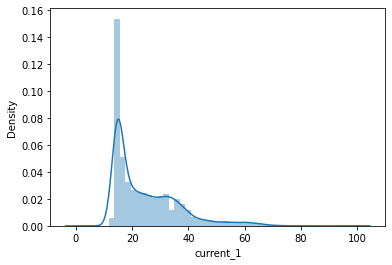

In [198]:
from scipy.stats import normaltest
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import skewtest
import seaborn as sns


print('===================normaltest=========================')
stat, p = normaltest(df_focus[focus])
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')
print('\n')

print('===================kstest=========================')
stat, p = kstest(df_focus[focus], 'norm')
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')
print('\n')



print('===================shapiro=========================')
stat, p = shapiro(df_focus[focus])
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')
print('\n')



print('===================skwness=========================')
stat, p = skewtest(df_focus[focus])
print('stat = {0}, p = {1}'.format(stat, p))
if stat < 1:
    print('balance')
else:
    print('not balance')
print('\n')

ax = sns.distplot(df_focus[focus])